### Import Functions

In [1]:
import train
t = train.Train()

Using TensorFlow backend.
V:\Programs\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Train model

In [ ]:
# Before doing under cell, DO THIS CELL
import pathlib from Path
Path("data/accuracy.txt").write_text("")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5039 - acc: 0.7999 - 

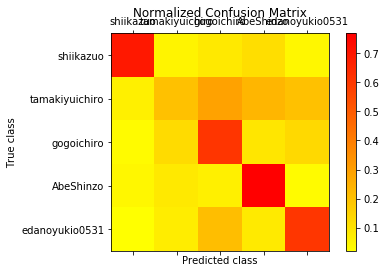

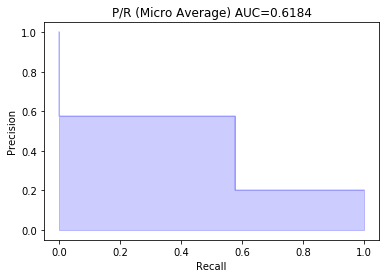

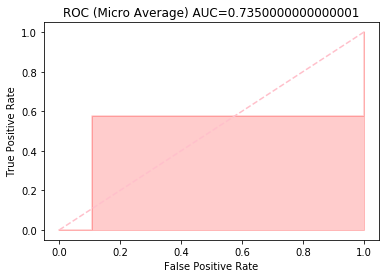

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               25728     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5117 - acc: 0.8000 - 

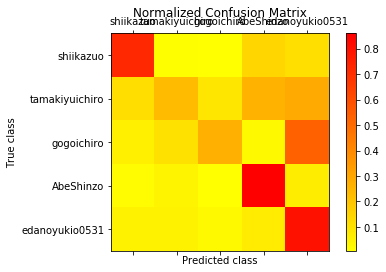

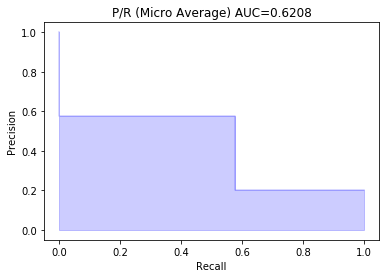

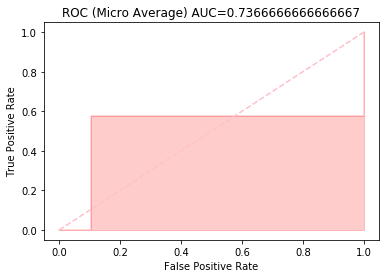

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5100 - acc: 0.8000 - 

1750/1750 [==============================] - 0s - loss: 0.3976 - acc: 0.8248 - val_loss: 0.3972 - val_acc: 0.8275
Epoch 58/256
1750/1750 [==============================] - 0s - loss: 0.3957 - acc: 0.8262 - val_loss: 0.3952 - val_acc: 0.8277
Epoch 59/256
1750/1750 [==============================] - 0s - loss: 0.3937 - acc: 0.8264 - val_loss: 0.3930 - val_acc: 0.8277
Epoch 60/256
1750/1750 [==============================] - 0s - loss: 0.3912 - acc: 0.8270 - val_loss: 0.3910 - val_acc: 0.8293
Epoch 61/256
1750/1750 [==============================] - 0s - loss: 0.3890 - acc: 0.8270 - val_loss: 0.3886 - val_acc: 0.8288
Epoch 62/256
1750/1750 [==============================] - 0s - loss: 0.3869 - acc: 0.8257 - val_loss: 0.3866 - val_acc: 0.8285
Epoch 63/256
1750/1750 [==============================] - 0s - loss: 0.3847 - acc: 0.8274 - val_loss: 0.3840 - val_acc: 0.8301
Epoch 64/256
1750/1750 [==============================] - 0s - loss: 0.3823 - acc: 0.8279 - val_loss: 0.3828 - val_acc: 0.83

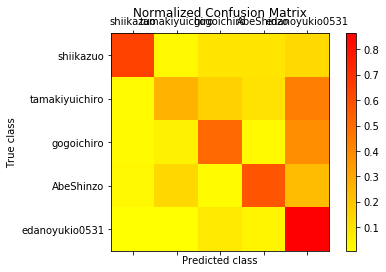

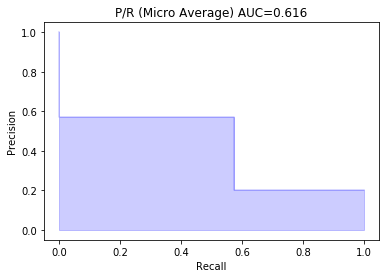

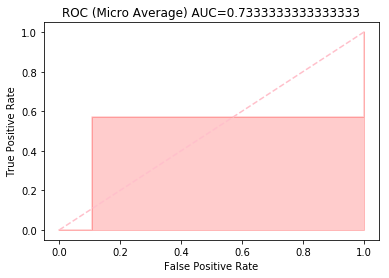

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5021 - acc: 0.8000 - 

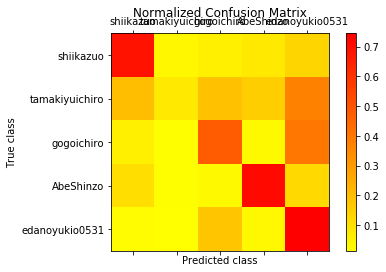

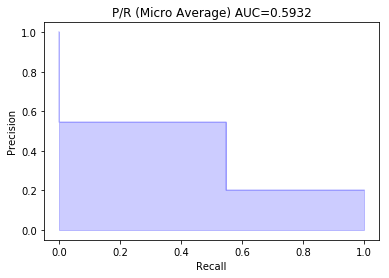

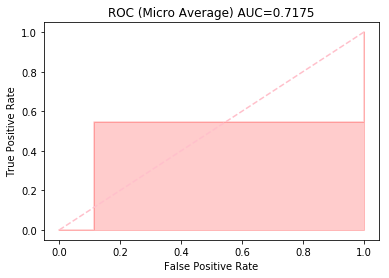

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5020 - acc: 0.8000 - 

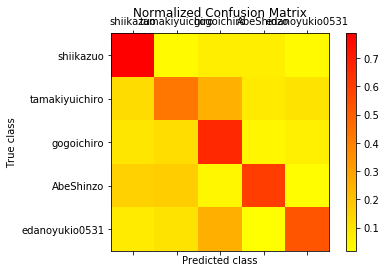

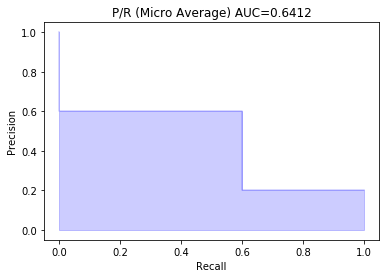

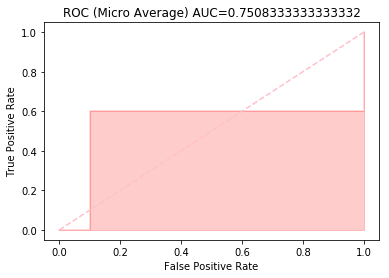

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_27 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_29 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_30 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5145 - acc: 0.7999 - 

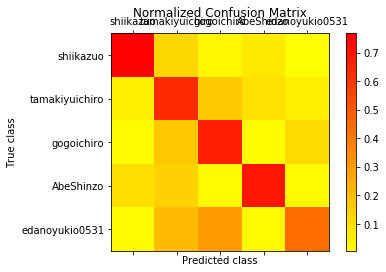

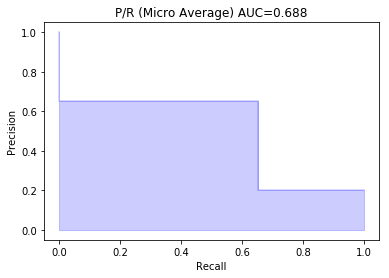

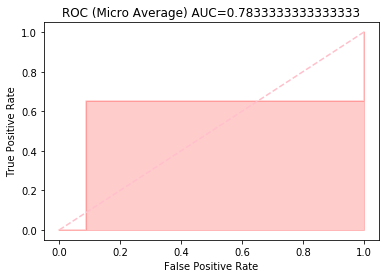

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_33 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_34 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_35 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5056 - acc: 0.8000 - 

448/750 [================>.............] - ETA: 0s[0.3092873562971751, 0.8690666769345602]


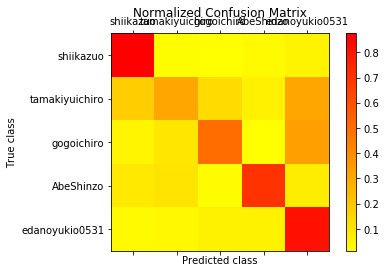

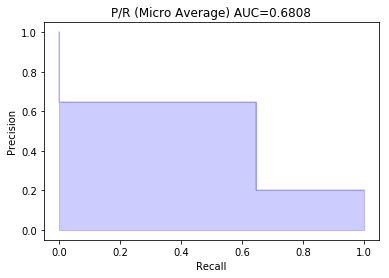

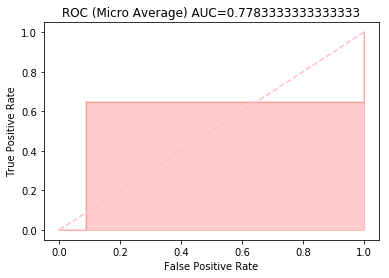

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_37 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_39 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5086 - acc: 0.8000 - 

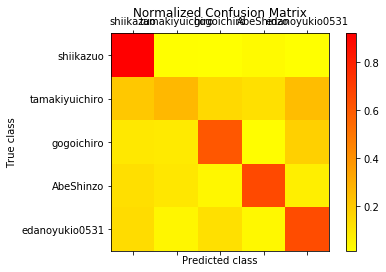

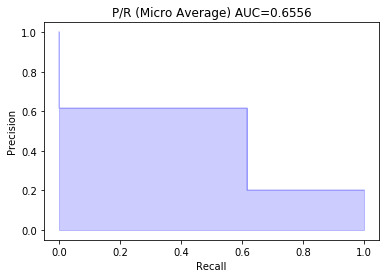

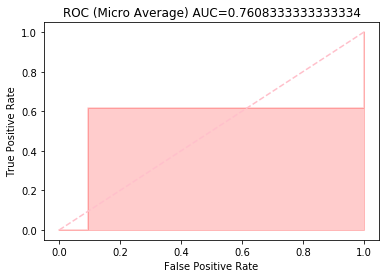

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_44 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_45 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5044 - acc: 0.8000 - 

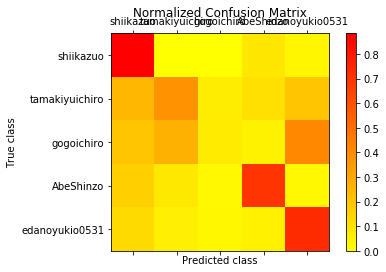

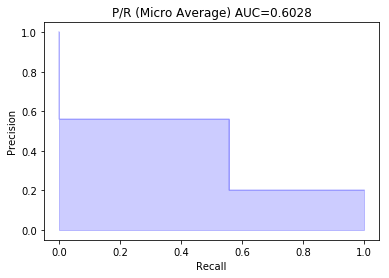

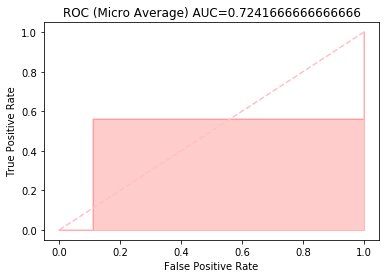

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 128)               25728     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_50 (Dense)             (None, 5)                 85        
Total params: 36,677
Trainable params: 36,677
Non-trainable params: 0
_________________________________________________________________
Train on 1750 samples, validate on 750 samples
Epoch 1/256
1750/1750 [==============================] - 0s - loss: 0.5075 - acc: 0.8000 - 

1750/1750 [==============================] - 0s - loss: 0.3579 - acc: 0.8486 - val_loss: 0.3632 - val_acc: 0.8464
Epoch 58/256
448/750 [================>.............] - ETA: 0s[0.36446200315157573, 0.8450667085647583]


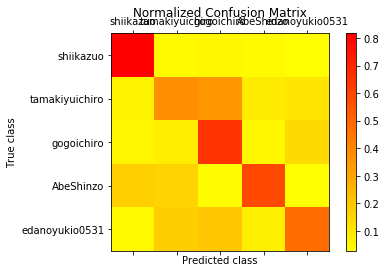

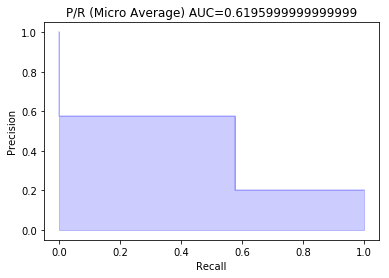

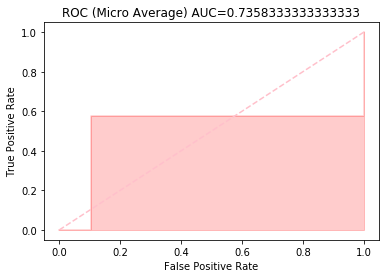

In [2]:
# DO CAREFULLY
i = 10
for i in range(1,i+1):
    t.main(i)

### Analyze Results (Average Comfusion Matrix)

Average Accuracy: 0.8473866964817047


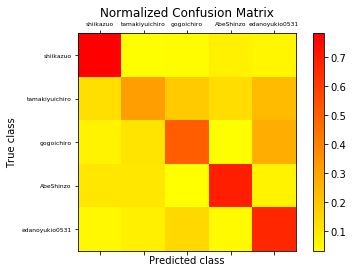

In [5]:
import csv

import numpy as np
import matplotlib.pyplot as plt

politicians = t.get_politicians()

accuracies = []
with open("data/accuracy.txt","r") as f:
    for l in f.readlines():
        accuracies.append(float(l))
print("Average Accuracy:",np.mean(accuracies))
        

cm = []
for i in range(1, i+1):
    cm.append(np.load("data/cm{0}.npy".format(i)))
cm = np.asarray(cm)
cm_a = np.mean(cm,axis=0)

fig = plt.figure()
ax = plt.subplot()
cax = ax.matshow(cm_a, interpolation="nearest", cmap="autumn_r")
fig.colorbar(cax)
ax.set_xticklabels([""]+politicians,fontsize=6)
ax.set_yticklabels([""]+politicians,fontsize=6)
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

with open("data/cm.csv","w") as f:
    writer = csv.writer(f,delimiter=",")
    writer.writerows(cm_a)